# Deforming paths

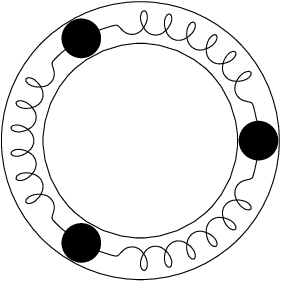

In [1]:
# contributed by Gert-Ludwig Ingold

from pyx import *

n = 3                 # number of masses
r = 3.0               # system radius
rcyc = 0.3            # radius of cycloid
nl = 13               # number of loops
rc = 0.5              # radius of masses
eps = 0.03            # extra spacing for surrounding circles

c = canvas.canvas()
springcircle = path.circle(0, 0, r)
masspositions = [i*springcircle.arclen()/n
                 for i in range(n)]
for springsegment in springcircle.split(masspositions):
    c.stroke(springsegment,
             [deformer.cycloid(rcyc, nl),
              deformer.smoothed(radius=0.1)])
for x, y in springcircle.at(masspositions):
    c.fill(path.circle(x, y, rc))

c.stroke(springcircle, [deformer.parallel(rc+eps)])
c.stroke(springcircle, [deformer.parallel(-rc-eps)])

c

In this example, another type of stroke attributes is demonstrated, namely the
`deformers`. They take an original curve and return a modified one.  Here, the
first deformer bends three arcs into spirals, the next one smooths the result
a bit.

In the example code, a circle is first created and then split into three
segments. Each segment of the arc is then stroked with `deformer.cycloid` and
`deformer.smoothed`, which create the spring-like look of the segments. The
cycloid does not start at the very beginning of the original path. Instead, it
first follows the original path for a certain length and then starts, yielding
a sharp corner. This corner is smoothed a bit by the second deformer.

<img src="http://pyx.sourceforge.net/bend.png" align="left"> Note that the order of the deformer attributes is not arbitrary, since the
deforming operations do not commute.

The two circles surrounding the springs are not created as simple circles but
rather as the curves with constant distance to the original circle. This
demonstrates the use of a third deformer, namely `deformer.parallel`.
